# Project: Investigating how Sulfur Emissions correlate to Health, GDP, and Land Use

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>The data set I selected for this project is from Gapminder. There is a vast selection of data sets to choose from. I selected 4 datasets regarding human health and economic data. This project specifically targets the years between 1990 and 2000, and researches if and how sulfur emmissions correlate between economic output of a country, land usage, and lung cancer rates.

>Independent variable 
- Sulfur emissions (per person and total)

>Dependent variables: 
- GDP
- Number of new cases for lung cancer among men/women 
- Percent of Land Area used for Agriculture

In [57]:
import pandas as pd
import numpy as np
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### Importing Data found on Gapminder
>Datasets imported are new lung cancer cases for both male/female, sulfur emissions per person as well as total, GDP, and finally percent of land that's agriculture.
Units are as follows:
- Sulfur emissions per person : ***Kilograms***
- Total Sulfur emissions : ***Kilotonnes***
- Lung cancer in men/women : ***Number of new cases***
- GDP yearly growth
- Agricultural Land (% of land area)

In [58]:
nlm = pd.read_csv('newlcancer_male.csv')
nlf = pd.read_csv('newlcancer_female.csv')
sulfur_total = pd.read_csv('sulfur_total.csv')
sulfur_person = pd.read_csv('sulfur_person.csv')
gdp = pd.read_csv('gdp.csv')
percent_ag = pd.read_csv('percent_ag.csv')

In [59]:
#Creating a 'female' and 'male' column so that I can combine the two lung cancer datasets. 
male = np.repeat('male', nlm.shape[0])
female = np.repeat('female', nlf.shape[0])

In [60]:
nlm['sex'] = male
nlf['sex'] = female

In [61]:
nl = nlm.append(nlf)

In [62]:
#Confirming the two datasets are combined, as well as the 'sex' column. Good to go!
print(nl.shape)
nl.head()

(374, 29)


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,sex
0,Afghanistan,486.0,521.0,569.0,626.0,686.0,741.0,771.0,792.0,810.0,...,1130.0,1160.0,1190.0,1230.0,1280.0,1330.0,1380.0,1440.0,1510.0,male
1,Albania,456.0,462.0,460.0,459.0,464.0,478.0,492.0,514.0,539.0,...,683.0,697.0,702.0,707.0,716.0,729.0,745.0,764.0,779.0,male
2,Algeria,1060.0,1150.0,1120.0,1120.0,1130.0,1150.0,1080.0,1020.0,978.0,...,1090.0,1100.0,1130.0,1160.0,1210.0,1250.0,1300.0,1360.0,1420.0,male
3,Andorra,14.5,15.6,16.5,17.0,17.1,16.8,16.8,17.0,17.3,...,24.7,25.3,25.7,26.4,27.2,27.8,28.5,29.2,29.7,male
4,Angola,277.0,277.0,278.0,281.0,284.0,289.0,289.0,287.0,286.0,...,331.0,342.0,354.0,368.0,385.0,401.0,419.0,438.0,457.0,male


### Here I'm refining the datasets to only display years between 1990 and 2000

In [63]:
nl = nl[['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','sex']]
sulfur_person = sulfur_person[['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']]
sulfur_total = sulfur_total[['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']]

#It was easier to just list out the columns desired from the gdp and agriculture data sets.
percent_ag = percent_ag[['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']]
gdp_90s = gdp[['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000']]

In [64]:
nl.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,sex
0,486.0,521.0,569.0,626.0,686.0,741.0,771.0,792.0,810.0,829.0,856.0,male
1,456.0,462.0,460.0,459.0,464.0,478.0,492.0,514.0,539.0,561.0,586.0,male
2,1060.0,1150.0,1120.0,1120.0,1130.0,1150.0,1080.0,1020.0,978.0,957.0,952.0,male
3,14.5,15.6,16.5,17.0,17.1,16.8,16.8,17.0,17.3,17.5,17.7,male
4,277.0,277.0,278.0,281.0,284.0,289.0,289.0,287.0,286.0,286.0,287.0,male


In [65]:
sulfur_person.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,3.94,3.99,3.73,3.41,3.23,3.16,3.14,3.12,3.11,3.09,3.14
1,15.00,10.40,3.77,2.96,2.46,2.20,2.19,1.56,1.58,1.19,1.15
2,4.46,4.76,4.93,5.01,4.92,5.17,4.98,5.51,5.79,6.45,6.92
3,7.72,7.61,7.62,6.98,7.58,6.89,6.45,6.22,6.02,5.75,4.75
4,24.10,23.50,23.20,23.40,24.10,22.90,24.10,24.40,24.10,24.50,24.20


In [66]:
sulfur_total.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,57.90,59.40,61.00,62.60,64.20,65.90,67.70,69.40,71.30,73.20,75.10
1,48.80,34.20,12.50,9.91,8.32,7.49,7.47,5.36,5.45,4.12,4.01
2,112.00,122.00,130.00,135.00,135.00,145.00,143.00,160.00,171.00,193.00,210.00
3,64.00,64.60,66.60,62.60,69.50,64.90,62.30,61.40,60.60,59.00,49.60
4,1.51,1.47,1.45,1.47,1.52,1.46,1.54,1.58,1.57,1.62,1.61


In [67]:
gdp_90s.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,-0.885,7.340,1.22,-5.140,-2.570,28.30,7.31,5.88,5.01,4.95,1.74
1,1.940,-28.900,-8.79,7.380,5.930,11.20,7.66,-11.10,11.80,9.36,6.76
2,-1.450,-1.080,1.65,-2.230,-0.999,3.69,3.72,1.02,5.03,3.14,2.45
3,3.830,2.680,1.11,-0.905,2.300,2.40,3.94,8.05,2.25,3.59,1.42
4,-0.445,0.991,-5.84,-24.000,1.340,15.00,20.00,5.50,0.00,3.24,3.01


In [68]:
percent_ag.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0.583,0.583,0.583,0.581,0.579,0.578,0.578,0.579,0.580,0.578,0.578
1,0.409,0.411,0.411,0.411,0.411,0.411,0.413,0.414,0.416,0.418,0.418
2,0.162,0.162,0.163,0.163,0.166,0.166,0.166,0.167,0.167,0.167,0.168
3,0.489,0.489,0.489,0.489,0.489,0.489,0.489,0.489,0.489,0.489,0.489
4,0.460,0.461,0.461,0.461,0.461,0.461,0.461,0.461,0.461,0.460,0.460


### Data Cleaning
Checking for any NULL and DUPLICATE values in the subset of data I selected. Looks like there are nulls present in one dataset!

In [69]:
nl.isnull().sum()

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
sex     0
dtype: int64

In [70]:
nl.duplicated().sum()

0

In [71]:
sulfur_person.isnull().sum()

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
dtype: int64

In [72]:
sulfur_person.duplicated().sum()

0

In [73]:
sulfur_total.isnull().sum()

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
dtype: int64

In [74]:
sulfur_total.duplicated().sum()

0

In [75]:
gdp_90s.isnull().sum()

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
dtype: int64

In [76]:
gdp_90s.duplicated().sum()

1

In [77]:
percent_ag.isnull().sum()

1990    30
1991    27
1992     8
1993     4
1994     4
1995     4
1996     4
1997     4
1998     4
1999     4
2000     2
dtype: int64

In [78]:
percent_ag.duplicated().sum()

2

In [79]:
#Dropping the NULL values from the agriculture dataset
percent_ag.dropna(inplace=True)

In [80]:
percent_ag.isnull().sum()

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
dtype: int64

In [81]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## Is there a positive correlation between sulfur emissions and higher number of new lung cancer cases?

In [82]:
#Checking the data types of each dataset
sulfur_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 11 columns):
1990    164 non-null float64
1991    164 non-null float64
1992    164 non-null float64
1993    164 non-null float64
1994    164 non-null float64
1995    164 non-null float64
1996    164 non-null float64
1997    164 non-null float64
1998    164 non-null float64
1999    164 non-null float64
2000    164 non-null float64
dtypes: float64(11)
memory usage: 14.2 KB


In [83]:
nl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 186
Data columns (total 12 columns):
1990    374 non-null float64
1991    374 non-null float64
1992    374 non-null float64
1993    374 non-null float64
1994    374 non-null float64
1995    374 non-null float64
1996    374 non-null float64
1997    374 non-null float64
1998    374 non-null float64
1999    374 non-null float64
2000    374 non-null float64
sex     374 non-null object
dtypes: float64(11), object(1)
memory usage: 38.0+ KB


In [84]:
#Making dataframes made of averages for each column for each dataset
sulfur_tavg = sulfur_total.mean()
sulfur_tavg.name = 'sulfur_total_average'
sulfur_tavg.head()

1990    407.596921
1991    415.629951
1992    368.012780
1993    357.004720
1994    343.775250
Name: sulfur_total_average, dtype: float64

In [91]:
nl_avg = nl.mean()
nl_avg.name = 'new_cancer_cases_avg'
nl_avg.head()

1990    2863.967246
1991    2927.887380
1992    3011.265588
1993    3116.070481
1994    3201.047487
Name: new_cancer_cases_avg, dtype: float64

In [86]:
sulfur_pavg = sulfur_person.mean()
sulfur_pavg.name = 'sulfur_person_average'
sulfur_pavg.head()

1990    17.416488
1991    45.656915
1992    14.800299
1993    13.889951
1994    13.154604
Name: sulfur_person_average, dtype: float64

In [94]:
nl_sft = nl_avg.append(sulfur_tavg)
nl_sft

1990    2863.967246
1991    2927.887380
1992    3011.265588
1993    3116.070481
1994    3201.047487
1995    3269.494385
1996    3304.601283
1997    3344.598663
1998    3407.625267
1999    3492.816497
2000    3589.738770
1990     407.596921
1991     415.629951
1992     368.012780
1993     357.004720
1994     343.775250
1995     332.051357
1996     327.601549
1997     342.613949
1998     328.286611
1999     313.782962
2000     311.103270
dtype: float64

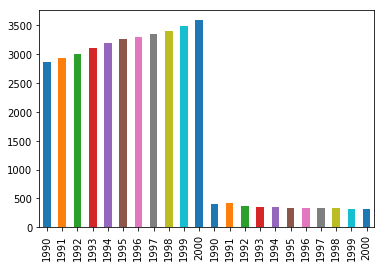

In [96]:
nl_sft.plot(kind= 'bar');

In [99]:
nl_sft = pd.Dataframe({'New_Cancer_Cases': nl_avg
                      'Total_Sulfur_Emissions': sulfur_tavg}, index=index)

AttributeError: module 'pandas' has no attribute 'Dataframe'

### Does one sex have a higher number of new lung cancer cases?

In [28]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [101]:
nl.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,sex
0,486.0,521.0,569.0,626.0,686.0,741.0,771.0,792.0,810.0,829.0,856.0,male
1,456.0,462.0,460.0,459.0,464.0,478.0,492.0,514.0,539.0,561.0,586.0,male
2,1060.0,1150.0,1120.0,1120.0,1130.0,1150.0,1080.0,1020.0,978.0,957.0,952.0,male
3,14.5,15.6,16.5,17.0,17.1,16.8,16.8,17.0,17.3,17.5,17.7,male
4,277.0,277.0,278.0,281.0,284.0,289.0,289.0,287.0,286.0,286.0,287.0,male


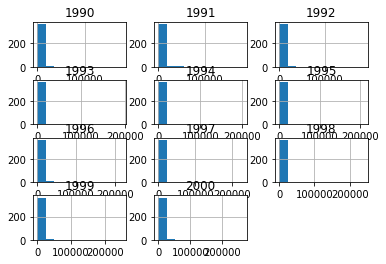

In [103]:
nl.hist();

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])